# Exploratory Data Analysis - Morocco Airbnb Listings

**Dataset**: `morocco_listings_full.csv` (Clean dataset from `json_to_csv_pipeline.py`)

**Objective**: Comprehensive analysis of 65,988 Airbnb listings across 13 Moroccan cities

## 🎯 Analysis Goals
1. **Data Quality**: Verify completeness, distributions, outliers
2. **Geographic Patterns**: City-level pricing, availability, and property characteristics
3. **Seasonal Trends**: How prices vary across seasons
4. **Property Features**: Room types, property types, amenities
5. **Pricing Insights**: Identify key price drivers
6. **Feature Relationships**: Correlation analysis for model building

## 📊 Dataset Overview
- **13 cities**: Agadir, Al Hoceima, Casablanca, Chefchaouen, Essaouira, Fes, Marrakech, Meknes, Ouarzazate, Oujda, Rabat, Tangier, Tétouan
- **4 seasons**: Spring, Summer, Fall, Winter (2025-2026)
- **26 features**: Geographic, pricing, property details, ratings, badges

## 1. Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Paths
ROOT = Path('/home/medgm/vsc/dApp-Ai')
DATA_PATH = ROOT / 'data' / 'morocco_listings_full.csv'

print("📊 Morocco Airbnb Listings - Exploratory Data Analysis")
print("=" * 70)

📊 Morocco Airbnb Listings - Exploratory Data Analysis


In [2]:
# Load dataset
df = pd.read_csv(DATA_PATH)

print(f"✓ Loaded dataset: {len(df):,} listings")
print(f"✓ Features: {len(df.columns)} columns")
print(f"✓ Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nShape: {df.shape}")

✓ Loaded dataset: 65,988 listings
✓ Features: 26 columns
✓ Memory usage: 57.24 MB

Shape: (65988, 26)


In [3]:
# First look at data
df.head(10)

,room_id,listing_name,title,city_slug,city,latitude,longitude,season,check_in,stay_length_nights,check_out,total_price,currency,nightly_price,discount_rate,bedroom_count,bed_count,room_type,property_type,rating_value,rating_count,badge_count,badges,is_superhost,image_count,file_source
0,657018419326569906,"Lovely, Calm Apartment with Sea View",Apartment in Al Hoceima,al_hociema,Al Hoceima,35.24,-3.96,winter,2026-02-01,7,2026-02-08,2893.00,MAD,413.29,0.81,1,2,Entire home/apt,Apartment,4.93,116,1,GUEST_FAVORITE,False,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
1,1528297098782379139,Apartment with full sea view,Apartment in Al Hoceima,al_hociema,Al Hoceima,35.23,-3.92,winter,2026-02-01,7,2026-02-08,3156.00,MAD,450.86,0.91,2,3,Entire home/apt,Apartment,0.00,0,1,SUPERHOST,True,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
2,1403878872257533765,Welcome to THE VIEW!,Apartment in Al Hoceima,al_hociema,Al Hoceima,35.24,-3.95,winter,2026-02-01,7,2026-02-08,6391.00,MAD,913.00,0.00,3,7,Entire home/apt,Apartment,5.00,16,1,GUEST_FAVORITE,False,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
3,1445696944527571074,Oceanview Villa + FREE Private Parking,Home in Al Hoceima,al_hociema,Al Hoceima,35.24,-3.97,winter,2026-02-01,7,2026-02-08,8679.00,MAD,1239.86,0.91,3,4,Entire home/apt,House,5.00,17,1,GUEST_FAVORITE,False,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
4,1208858651718439062,Dalisa Apartment,Apartment in Al Hoceima,al_hociema,Al Hoceima,35.24,-3.93,winter,2026-02-01,7,2026-02-08,4078.00,MAD,582.57,0.90,2,3,Entire home/apt,Apartment,5.00,9,1,TOP_X_GUEST_FAVORITE,False,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
5,941161126169487761,Beautiful Perle Bleu 3 Apartment,Apartment in Al Hoceima,al_hociema,Al Hoceima,35.24,-3.92,winter,2026-02-01,7,2026-02-08,3954.00,MAD,564.86,0.00,2,3,Entire home/apt,Apartment,4.89,118,1,GUEST_FAVORITE,False,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
6,1466907332093866252,Panoramic view of a New App,Home in Al Hoceima,al_hociema,Al Hoceima,35.23,-3.94,winter,2026-02-01,7,2026-02-08,3041.00,MAD,434.43,0.91,1,1,Entire home/apt,House,5.00,4,1,SUPERHOST,True,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
7,1399493885672407999,Beautiful view apartment Al Hoceima sea view 7,Apartment in Al Hoceima,al_hociema,Al Hoceima,35.23,-3.92,winter,2026-02-01,7,2026-02-08,7324.00,MAD,1046.29,0.82,2,3,Entire home/apt,Apartment,4.92,13,1,SUPERHOST,True,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
8,673273184258692953,"Near the beach, cosy, calme & city center located",Vacation home in Al Hoceima,al_hociema,Al Hoceima,35.25,-3.93,winter,2026-02-01,7,2026-02-08,2481.00,MAD,354.43,0.92,2,4,Entire home/apt,House,4.91,121,1,GUEST_FAVORITE,False,6,data/raw_scrapes_expanded/by_city/al_hociema/a...
9,1469949548954868631,Panoramic Coastal Apartment with Elegant Comfort,Apartment in Al Hoceima,al_hociema,Al Hoceima,35.24,-3.93,winter,2026-02-01,7,2026-02-08,5541.00,MAD,791.57,0.00,2,3,Entire home/apt,Apartment,5.00,9,1,TOP_X_GUEST_FAVORITE,False,6,data/raw_scrapes_expanded/by_city/al_hociema/a...


In [4]:
# Column overview
print("\n📋 Dataset Columns:")
print("=" * 70)
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    null_pct = df[col].isnull().sum() / len(df) * 100
    unique = df[col].nunique()
    print(f"{i:2d}. {col:25s} | {str(dtype):10s} | Null: {null_pct:5.1f}% | Unique: {unique:6,}")


📋 Dataset Columns:
 1. room_id                   | int64      | Null:   0.0% | Unique:  7,828
 2. listing_name              | object     | Null:   0.0% | Unique:  7,569
 3. title                     | object     | Null:   0.0% | Unique:    405
 4. city_slug                 | object     | Null:   0.0% | Unique:     13
 5. city                      | object     | Null:   0.0% | Unique:     13
 6. latitude                  | float64    | Null:   0.0% | Unique:  5,615
 7. longitude                 | float64    | Null:   0.0% | Unique:  5,903
 8. season                    | object     | Null:   0.0% | Unique:      4
 9. check_in                  | object     | Null:   0.0% | Unique:     22
10. stay_length_nights        | int64      | Null:   0.0% | Unique:      3
11. check_out                 | object     | Null:   0.0% | Unique:     22
12. total_price               | float64    | Null:   0.0% | Unique:  6,858
13. currency                  | object     | Null:   0.0% | Unique:      1
14. n

## 2. Data Quality Assessment

In [5]:
# Missing values analysis
print("\n🔍 Missing Values Analysis")
print("=" * 70)
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✅ No missing values found in dataset!")


🔍 Missing Values Analysis
        Missing Count  Percentage
badges          25614       38.82


In [11]:
# Data types summary
print("\n📊 Data Types Summary")
print("=" * 70)
print(df.dtypes.value_counts())
print("\nNumeric columns:", df.select_dtypes(include=[np.number]).columns.tolist())
print("\nCategorical columns:", df.select_dtypes(include=['object', 'bool']).columns.tolist())


📊 Data Types Summary
object     12
int64       7
float64     6
bool        1
Name: count, dtype: int64

Numeric columns: ['room_id', 'latitude', 'longitude', 'stay_length_nights', 'total_price', 'nightly_price', 'discount_rate', 'bedroom_count', 'bed_count', 'rating_value', 'rating_count', 'badge_count', 'image_count']

Categorical columns: ['listing_name', 'title', 'city_slug', 'city', 'season', 'check_in', 'check_out', 'currency', 'room_type', 'property_type', 'badges', 'is_superhost', 'file_source']


In [13]:
# Basic statistics for numeric features
print("\n📈 Numeric Features Summary")
print("=" * 70)
df.describe()


📈 Numeric Features Summary


,room_id,latitude,longitude,stay_length_nights,total_price,nightly_price,discount_rate,bedroom_count,bed_count,rating_value,rating_count,badge_count,image_count
count,65988.00,65988.00,65988.00,65988.00,65988.00,65988.00,65988.00,65988.00,65988.00,65988.00,65988.00,65988.00,65988.00
mean,1054608048144943104.00,33.68,-6.27,7.79,4003.78,598.79,0.28,1.72,2.36,3.70,45.86,0.61,5.97
std,519484886730002048.00,1.73,2.12,3.60,3034.62,456.19,0.40,1.78,2.38,2.06,80.72,0.49,0.25
min,29743.00,30.39,-9.77,3.00,311.00,91.50,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,876626714767581056.00,31.64,-7.66,7.00,2266.00,297.00,0.00,1.00,1.00,4.28,3.00,0.00,6.00
50%,1234642555200356096.00,34.02,-5.79,7.00,3196.00,466.93,0.00,2.00,2.00,4.83,16.00,1.00,6.00
75%,1459476059716058112.00,35.17,-5.26,7.00,4688.00,746.02,0.82,2.00,3.00,4.95,55.00,1.00,6.00
max,1558891718756649728.00,35.79,-1.88,14.00,43599.00,3158.33,0.93,44.00,50.00,5.00,1050.00,1.00,6.00


## 3. Geographic Distribution Analysis

In [6]:
# City distribution
print("\n🏙️  Listings by City")
print("=" * 70)
city_counts = df['city'].value_counts()
print(city_counts)
print(f"\nTotal cities: {df['city'].nunique()}")


🏙️  Listings by City
city
Tangier        5445
Meknes         5445
Tétouan        5365
Casablanca     5358
Al Hoceima     5337
Marrakech      5331
Agadir         5305
Rabat          5295
Essaouira      5201
Fes            5172
Chefchaouen    5111
Oujda          4958
Ouarzazate     2665
Name: count, dtype: int64

Total cities: 13


In [ ]:
# Visualize city distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
city_counts.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Number of Listings')
axes[0].set_ylabel('City')
axes[0].set_title('Listings Distribution by City', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Pie chart
city_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_ylabel('')
axes[1].set_title('City Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [7]:
# Average price by city
print("\n💰 Average Nightly Price by City")
print("=" * 70)
city_prices = df.groupby('city')['nightly_price'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
city_prices = city_prices.sort_values('mean', ascending=False)
city_prices.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Count']
print(city_prices.round(2))


💰 Average Nightly Price by City
              Mean  Median  Std Dev    Min     Max  Count
city                                                     
Marrakech   762.44  584.57   573.75  93.79 3140.29   5331
Rabat       703.10  551.71   504.63  92.50 3148.86   5295
Agadir      700.50  558.43   511.42  93.93 3157.33   5305
Tangier     650.82  542.86   434.83  92.86 3112.00   5445
Ouarzazate  612.46  445.33   493.33  93.79 3125.00   2665
Casablanca  608.42  501.00   410.05 105.21 3105.00   5358
Fes         595.98  464.71   462.09  91.50 3114.33   5172
Meknes      570.90  448.43   439.89  91.79 3114.29   5445
Al Hoceima  552.83  448.36   378.59  91.71 2906.67   5337
Essaouira   550.73  419.00   451.35  93.43 3119.33   5201
Tétouan     518.19  399.14   413.40  92.57 3158.33   5365
Chefchaouen 477.38  357.86   378.98  93.21 2891.33   5111
Oujda       473.47  389.57   331.57  99.86 2906.67   4958


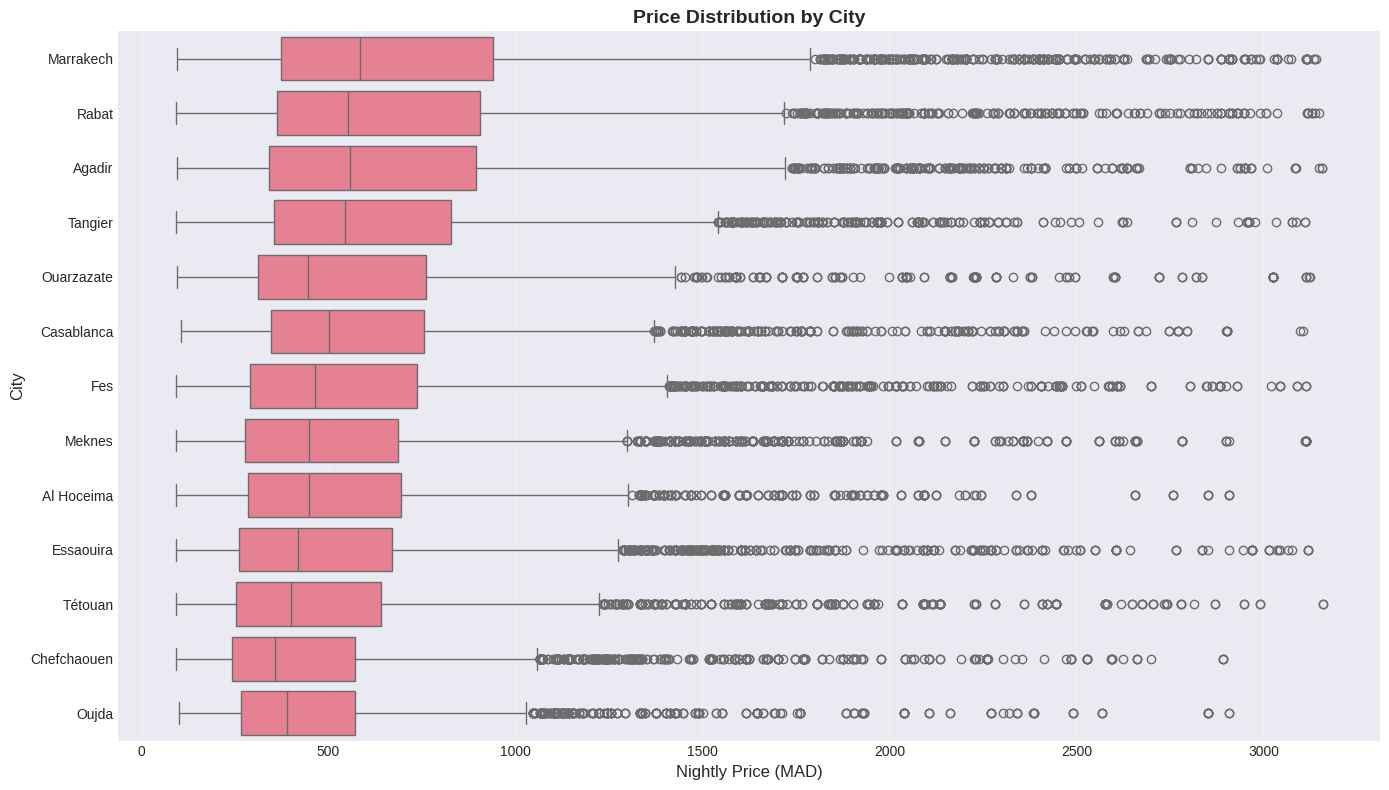

In [17]:
# Price distribution by city (box plot)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, y='city', x='nightly_price', order=city_prices.index)
plt.xlabel('Nightly Price (MAD)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Price Distribution by City', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Seasonal Patterns Analysis

In [18]:
# Season distribution
print("\n🌤️  Listings by Season")
print("=" * 70)
season_counts = df['season'].value_counts()
print(season_counts)
print(f"\nTotal seasons: {df['season'].nunique()}")


🌤️  Listings by Season
season
spring    18593
summer    17826
winter    15256
fall      14313
Name: count, dtype: int64

Total seasons: 4


In [8]:
# Average price by season
print("\n💰 Average Nightly Price by Season")
print("=" * 70)
season_prices = df.groupby('season')['nightly_price'].agg(['mean', 'median', 'std', 'count'])
season_prices = season_prices.sort_values('mean', ascending=False)
season_prices.columns = ['Mean', 'Median', 'Std Dev', 'Count']
print(season_prices.round(2))


💰 Average Nightly Price by Season
         Mean  Median  Std Dev  Count
season                               
winter 696.94  585.14   433.27  15256
fall   588.69  441.14   467.40  14313
spring 579.31  440.21   455.04  18593
summer 543.20  397.57   454.47  17826


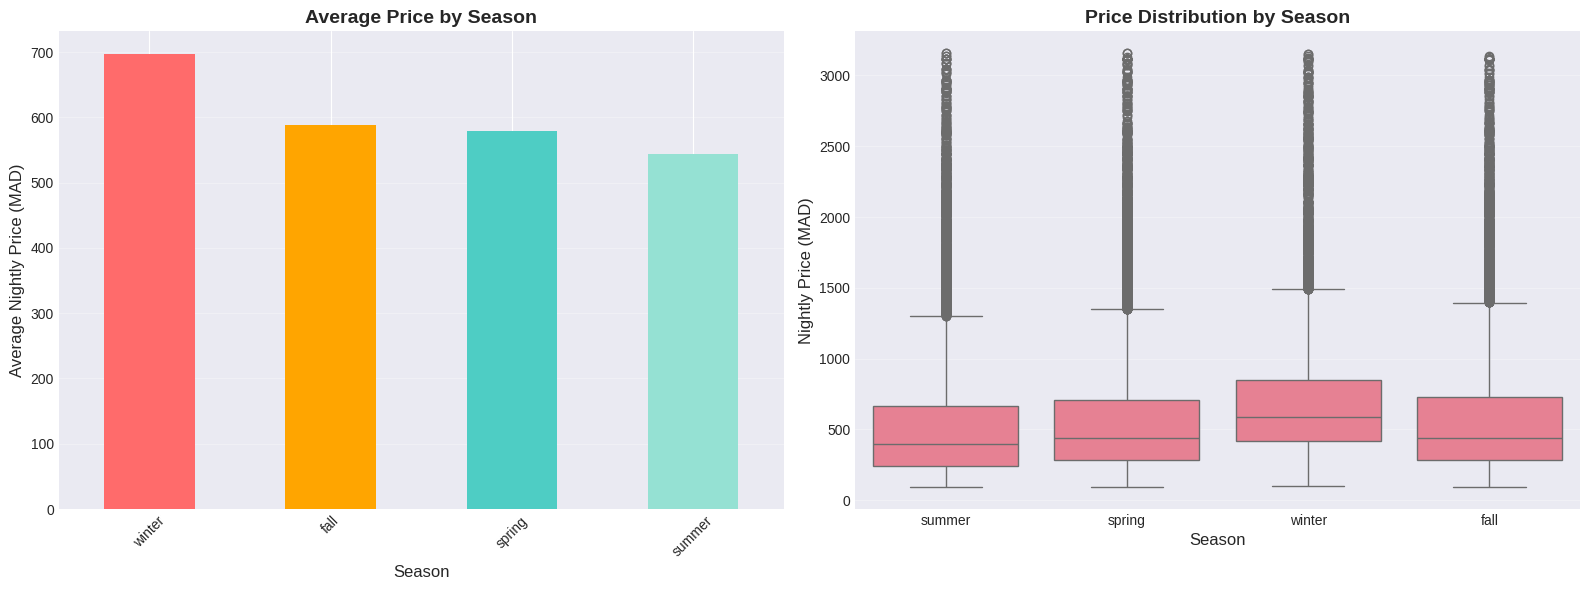

In [20]:
# Seasonal price patterns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
season_prices['Mean'].plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#FFA500', '#4ECDC4', '#95E1D3'])
axes[0].set_xlabel('Season', fontsize=12)
axes[0].set_ylabel('Average Nightly Price (MAD)', fontsize=12)
axes[0].set_title('Average Price by Season', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Box plot
sns.boxplot(data=df, x='season', y='nightly_price', 
            order=['summer', 'spring', 'winter', 'fall'], ax=axes[1])
axes[1].set_xlabel('Season', fontsize=12)
axes[1].set_ylabel('Nightly Price (MAD)', fontsize=12)
axes[1].set_title('Price Distribution by Season', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# City × Season interaction
city_season = df.groupby(['city', 'season'])['nightly_price'].mean().unstack()
print("\n🏙️ × 🌤️  Average Price by City and Season")
print("=" * 70)
print(city_season.round(2))


🏙️ × 🌤️  Average Price by City and Season
season        fall  spring  summer  winter
city                                      
Agadir      677.95  681.64  620.60  842.53
Al Hoceima  549.68  540.36  492.07  645.10
Casablanca  594.13  596.70  554.54  706.20
Chefchaouen 476.06  463.04  440.03  538.28
Essaouira   539.89  528.65  540.23  599.40
Fes         592.82  588.81  543.48  668.43
Marrakech   740.36  774.89  698.14  849.22
Meknes      568.30  552.25  502.04  677.54
Ouarzazate     NaN  563.75  683.24  632.32
Oujda       471.89  452.01  427.34  557.03
Rabat       695.45  639.55  600.43  906.58
Tangier     633.49  644.96  570.09  772.41
Tétouan     504.70  485.21  460.67  637.67


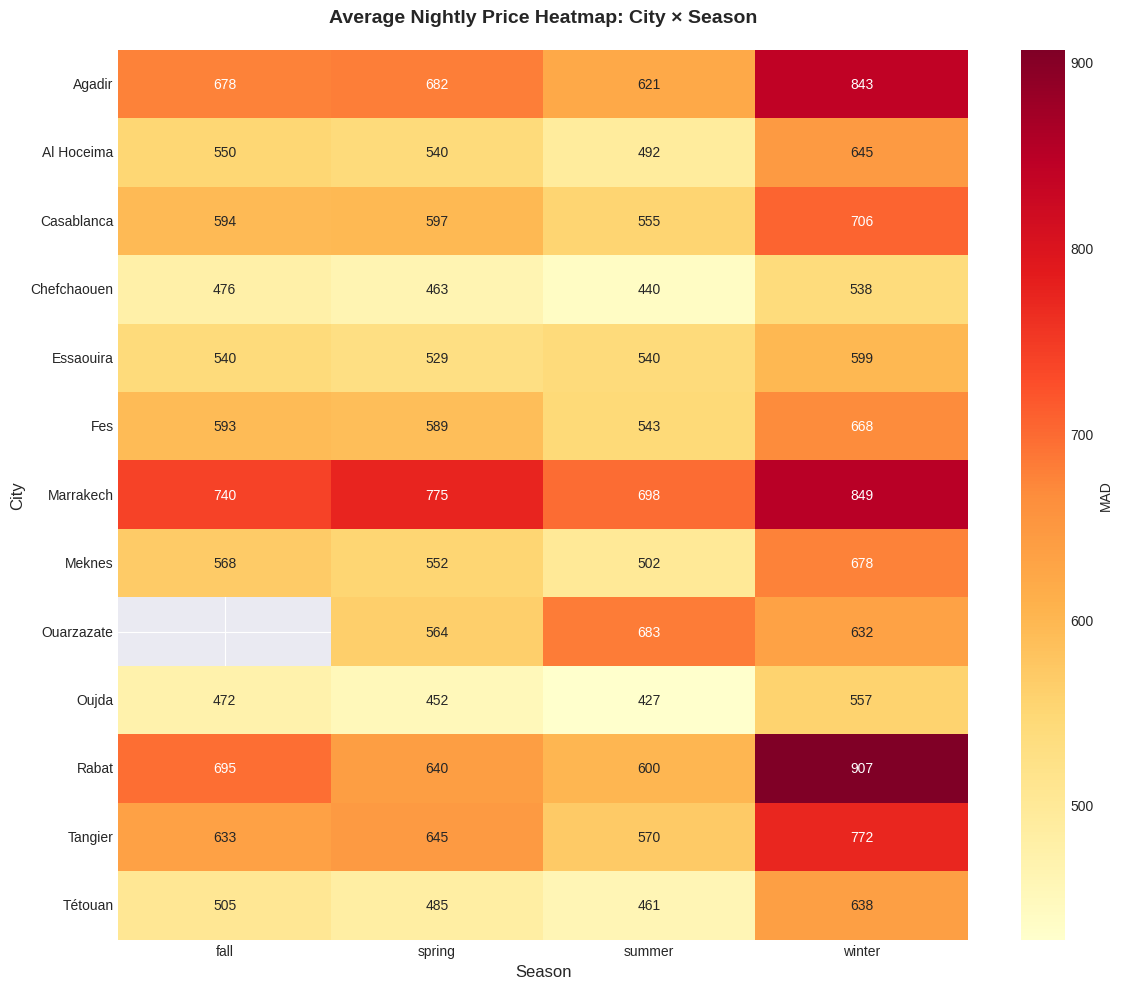

In [22]:
# Heatmap of city × season prices
plt.figure(figsize=(12, 10))
sns.heatmap(city_season, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'MAD'})
plt.title('Average Nightly Price Heatmap: City × Season', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Season', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

## 5. Property Characteristics Analysis

In [23]:
# Room type distribution
print("\n🏠 Room Type Distribution")
print("=" * 70)
room_type_counts = df['room_type'].value_counts()
print(room_type_counts)
print(f"\nPercentages:")
print((room_type_counts / len(df) * 100).round(2))


🏠 Room Type Distribution
room_type
Entire home/apt    59382
Private room        6606
Name: count, dtype: int64

Percentages:
room_type
Entire home/apt   89.99
Private room      10.01
Name: count, dtype: float64


In [10]:
# Property type distribution
print("\n🏢 Property Type Distribution")
print("=" * 70)
property_type_counts = df['property_type'].value_counts()
print(property_type_counts.head(15))
print(f"\nTop 10 percentages:")
print((property_type_counts.head(10) / len(df) * 100).round(2))


🏢 Property Type Distribution
property_type
Apartment            43901
Other                10461
House                 5178
Condominium           5032
Bed and breakfast      738
Villa                  410
Loft                   141
Boutique hotel         127
Name: count, dtype: int64

Top 10 percentages:
property_type
Apartment           66.53
Other               15.85
House                7.85
Condominium          7.63
Bed and breakfast    1.12
Villa                0.62
Loft                 0.21
Boutique hotel       0.19
Name: count, dtype: float64


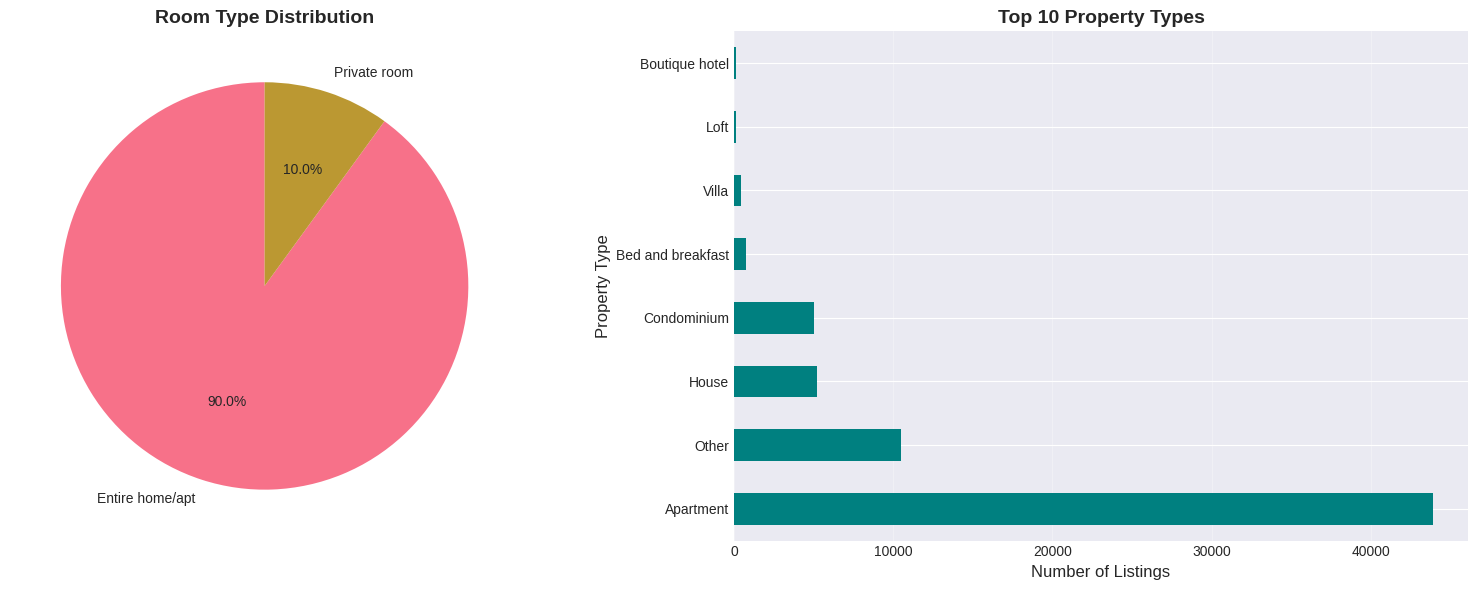

In [24]:
# Visualize room type and property type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Room type pie chart
room_type_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_ylabel('')
axes[0].set_title('Room Type Distribution', fontsize=14, fontweight='bold')

# Property type bar chart (top 10)
property_type_counts.head(10).plot(kind='barh', ax=axes[1], color='teal')
axes[1].set_xlabel('Number of Listings', fontsize=12)
axes[1].set_ylabel('Property Type', fontsize=12)
axes[1].set_title('Top 10 Property Types', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# Price by room type
print("\n💰 Average Price by Room Type")
print("=" * 70)
room_type_prices = df.groupby('room_type')['nightly_price'].agg(['mean', 'median', 'std', 'count'])
room_type_prices.columns = ['Mean', 'Median', 'Std Dev', 'Count']
print(room_type_prices.sort_values('Mean', ascending=False).round(2))


💰 Average Price by Room Type
                  Mean  Median  Std Dev  Count
room_type                                     
Entire home/apt 621.74  489.14   463.28  59382
Private room    392.40  299.29   319.57   6606


In [26]:
# Price by property type (top 10)
print("\n💰 Average Price by Property Type (Top 10)")
print("=" * 70)
property_type_prices = df.groupby('property_type')['nightly_price'].agg(['mean', 'median', 'count'])
property_type_prices.columns = ['Mean', 'Median', 'Count']
property_type_prices = property_type_prices.sort_values('Mean', ascending=False).head(10)
print(property_type_prices.round(2))


💰 Average Price by Property Type (Top 10)
                     Mean  Median  Count
property_type                           
Villa             1406.45 1245.71    410
House              758.97  548.86   5178
Condominium        622.39  518.43   5032
Apartment          594.20  479.33  43901
Loft               560.54  471.71    141
Other              510.26  334.29  10461
Boutique hotel     485.64  464.00    127
Bed and breakfast  419.78  335.43    738


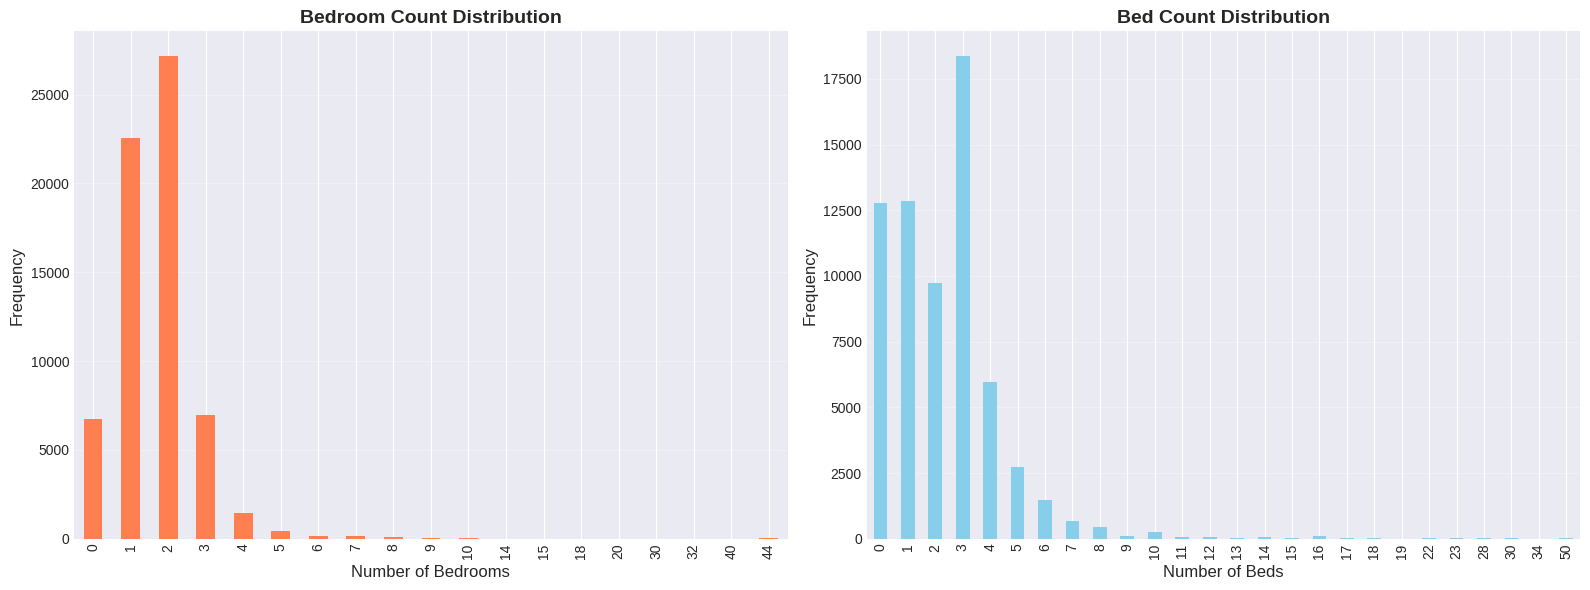


Bedroom stats: Mean=1.72, Median=2
Bed stats: Mean=2.36, Median=2


In [27]:
# Bedroom and bed count distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bedroom count
bedroom_counts = df['bedroom_count'].value_counts().sort_index()
bedroom_counts.plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_xlabel('Number of Bedrooms', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Bedroom Count Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Bed count
bed_counts = df['bed_count'].value_counts().sort_index()
bed_counts.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_xlabel('Number of Beds', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Bed Count Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBedroom stats: Mean={df['bedroom_count'].mean():.2f}, Median={df['bedroom_count'].median():.0f}")
print(f"Bed stats: Mean={df['bed_count'].mean():.2f}, Median={df['bed_count'].median():.0f}")

## 6. Pricing Analysis

In [12]:
# Overall price statistics
print("\n💰 Nightly Price Statistics (MAD)")
print("=" * 70)
print(f"Mean:      {df['nightly_price'].mean():8.2f}")
print(f"Median:    {df['nightly_price'].median():8.2f}")
print(f"Std Dev:   {df['nightly_price'].std():8.2f}")
print(f"Min:       {df['nightly_price'].min():8.2f}")
print(f"Max:       {df['nightly_price'].max():8.2f}")
print(f"Q1 (25%):  {df['nightly_price'].quantile(0.25):8.2f}")
print(f"Q3 (75%):  {df['nightly_price'].quantile(0.75):8.2f}")
print(f"IQR:       {df['nightly_price'].quantile(0.75) - df['nightly_price'].quantile(0.25):8.2f}")


💰 Nightly Price Statistics (MAD)
Mean:        598.79
Median:      466.93
Std Dev:     456.19
Min:          91.50
Max:        3158.33
Q1 (25%):    297.00
Q3 (75%):    746.02
IQR:         449.02


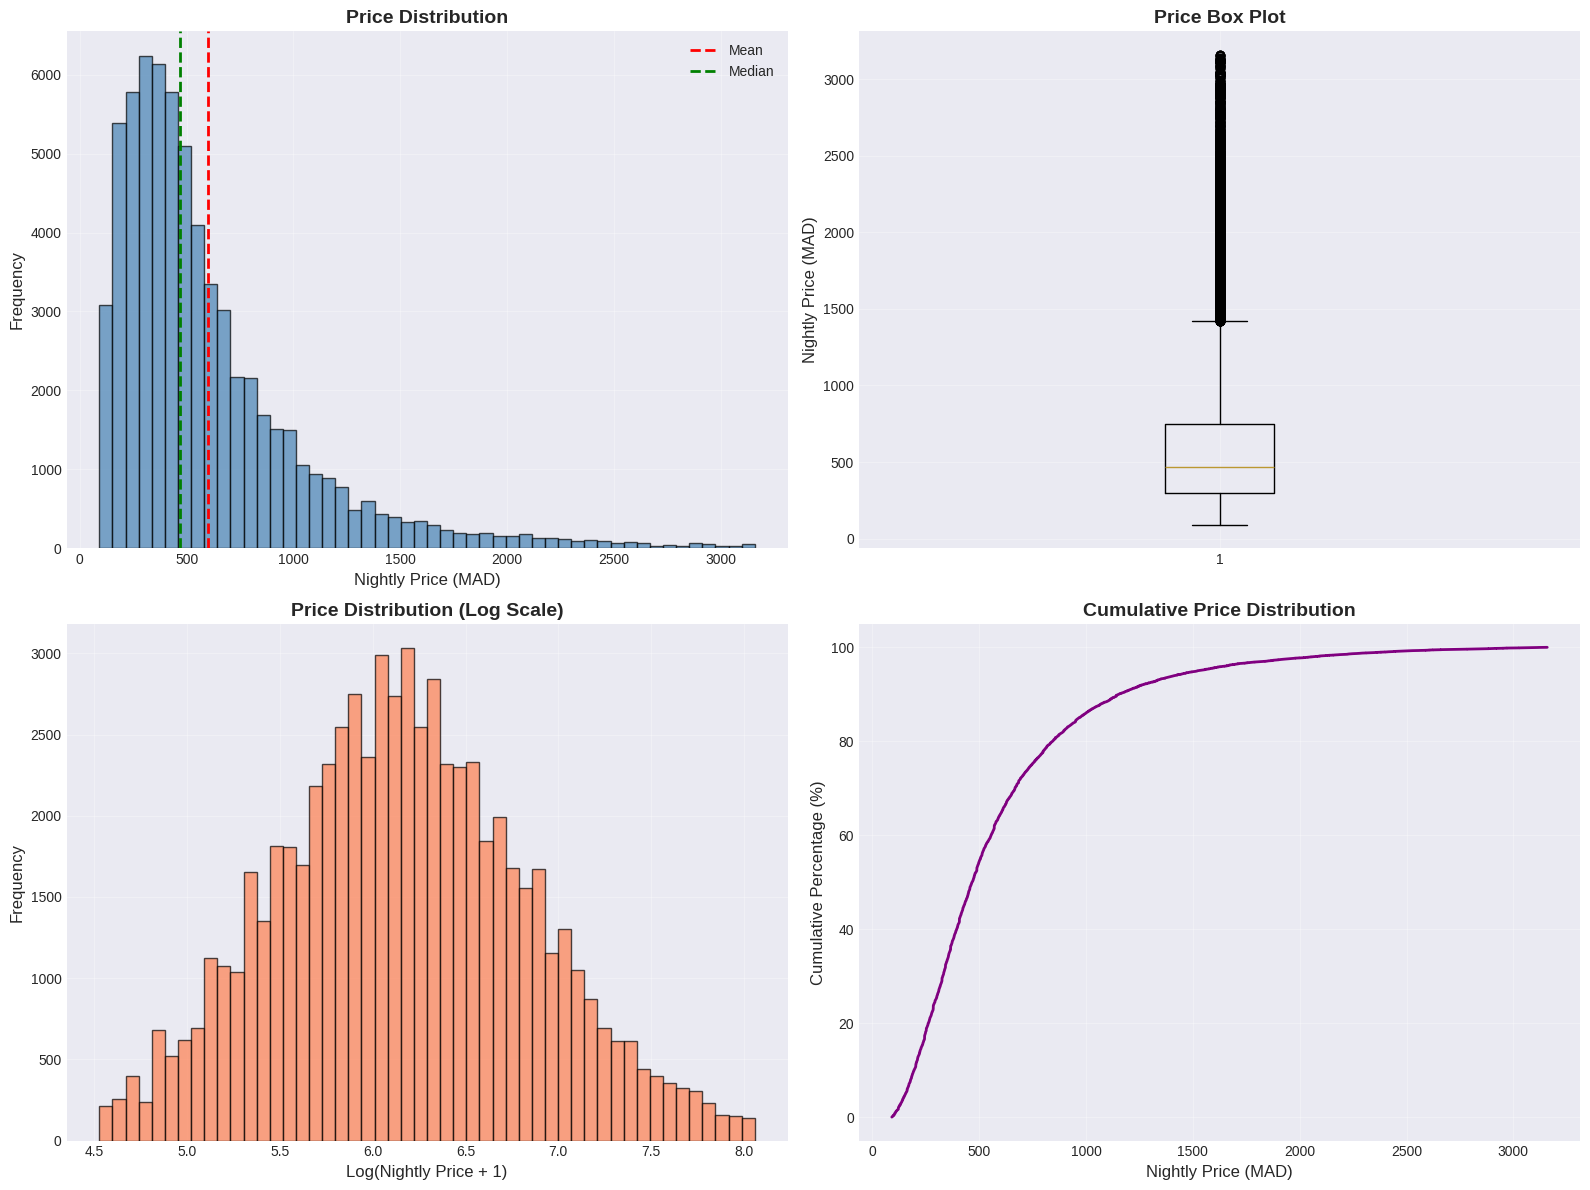

In [28]:
# Price distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df['nightly_price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['nightly_price'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(df['nightly_price'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_xlabel('Nightly Price (MAD)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot
axes[0, 1].boxplot(df['nightly_price'], vert=True)
axes[0, 1].set_ylabel('Nightly Price (MAD)', fontsize=12)
axes[0, 1].set_title('Price Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Log-scale histogram
axes[1, 0].hist(np.log1p(df['nightly_price']), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Log(Nightly Price + 1)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Price Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Cumulative distribution
sorted_prices = np.sort(df['nightly_price'])
cumulative = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices) * 100
axes[1, 1].plot(sorted_prices, cumulative, color='purple', linewidth=2)
axes[1, 1].set_xlabel('Nightly Price (MAD)', fontsize=12)
axes[1, 1].set_ylabel('Cumulative Percentage (%)', fontsize=12)
axes[1, 1].set_title('Cumulative Price Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# Stay length distribution
print("\n🛏️  Stay Length Statistics (Nights)")
print("=" * 70)
stay_counts = df['stay_length_nights'].value_counts().sort_index()
print(stay_counts)
print(f"\nMean: {df['stay_length_nights'].mean():.2f} nights")
print(f"Median: {df['stay_length_nights'].median():.0f} nights")


🛏️  Stay Length Statistics (Nights)
stay_length_nights
3     12050
7     39577
14    14361
Name: count, dtype: int64

Mean: 7.79 nights
Median: 7 nights


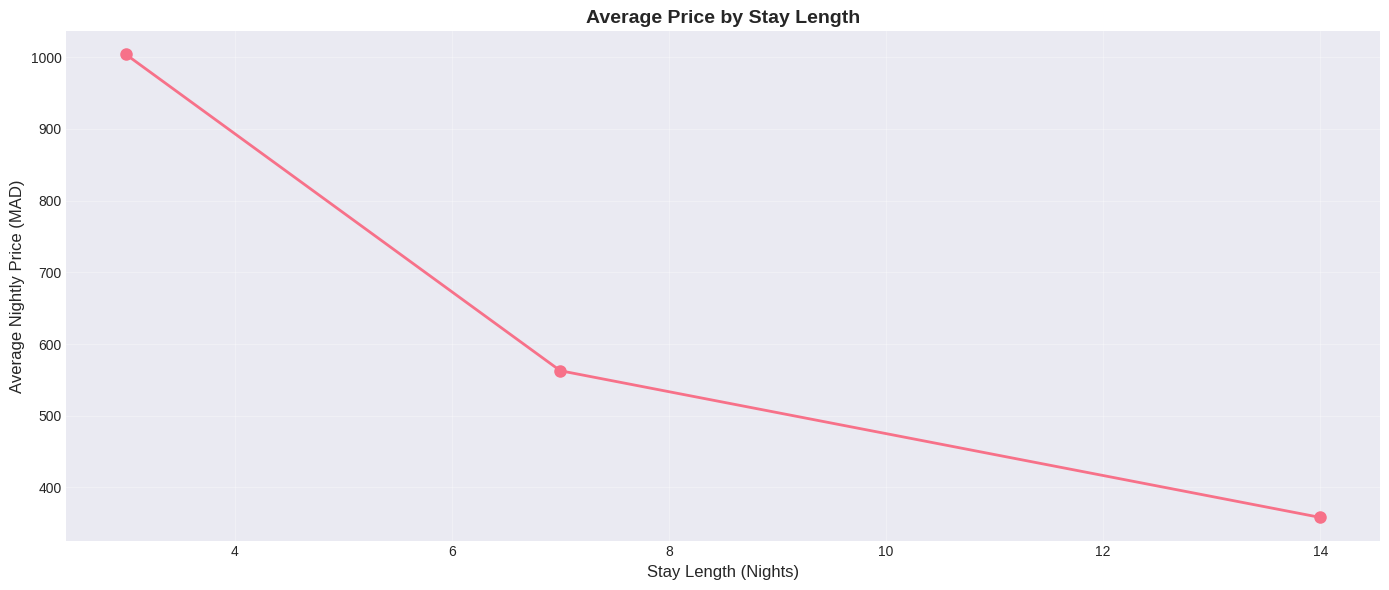

In [30]:
# Price vs stay length
stay_length_prices = df.groupby('stay_length_nights')['nightly_price'].mean().sort_index()

plt.figure(figsize=(14, 6))
plt.plot(stay_length_prices.index, stay_length_prices.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Stay Length (Nights)', fontsize=12)
plt.ylabel('Average Nightly Price (MAD)', fontsize=12)
plt.title('Average Price by Stay Length', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Ratings & Reviews Analysis

In [31]:
# Rating statistics
print("\n⭐ Rating Statistics")
print("=" * 70)
rating_stats = df['rating_value'].describe()
print(rating_stats)

# Percentage of listings with ratings
has_rating = df['rating_value'].notna().sum()
print(f"\nListings with ratings: {has_rating:,} ({has_rating/len(df)*100:.1f}%)")
print(f"Listings without ratings: {len(df) - has_rating:,} ({(len(df) - has_rating)/len(df)*100:.1f}%)")


⭐ Rating Statistics
count   65988.00
mean        3.70
std         2.06
min         0.00
25%         4.28
50%         4.83
75%         4.95
max         5.00
Name: rating_value, dtype: float64

Listings with ratings: 65,988 (100.0%)
Listings without ratings: 0 (0.0%)


In [32]:
# Review count statistics
print("\n📝 Review Count Statistics")
print("=" * 70)
review_stats = df['rating_count'].describe()
print(review_stats)

print(f"\nListings with 0 reviews: {(df['rating_count'] == 0).sum():,}")
print(f"Listings with 1-10 reviews: {((df['rating_count'] >= 1) & (df['rating_count'] <= 10)).sum():,}")
print(f"Listings with 11-50 reviews: {((df['rating_count'] >= 11) & (df['rating_count'] <= 50)).sum():,}")
print(f"Listings with 50+ reviews: {(df['rating_count'] > 50).sum():,}")


📝 Review Count Statistics
count   65988.00
mean       45.86
std        80.72
min         0.00
25%         3.00
50%        16.00
75%        55.00
max      1050.00
Name: rating_count, dtype: float64

Listings with 0 reviews: 15,601
Listings with 1-10 reviews: 12,795
Listings with 11-50 reviews: 20,018
Listings with 50+ reviews: 17,574


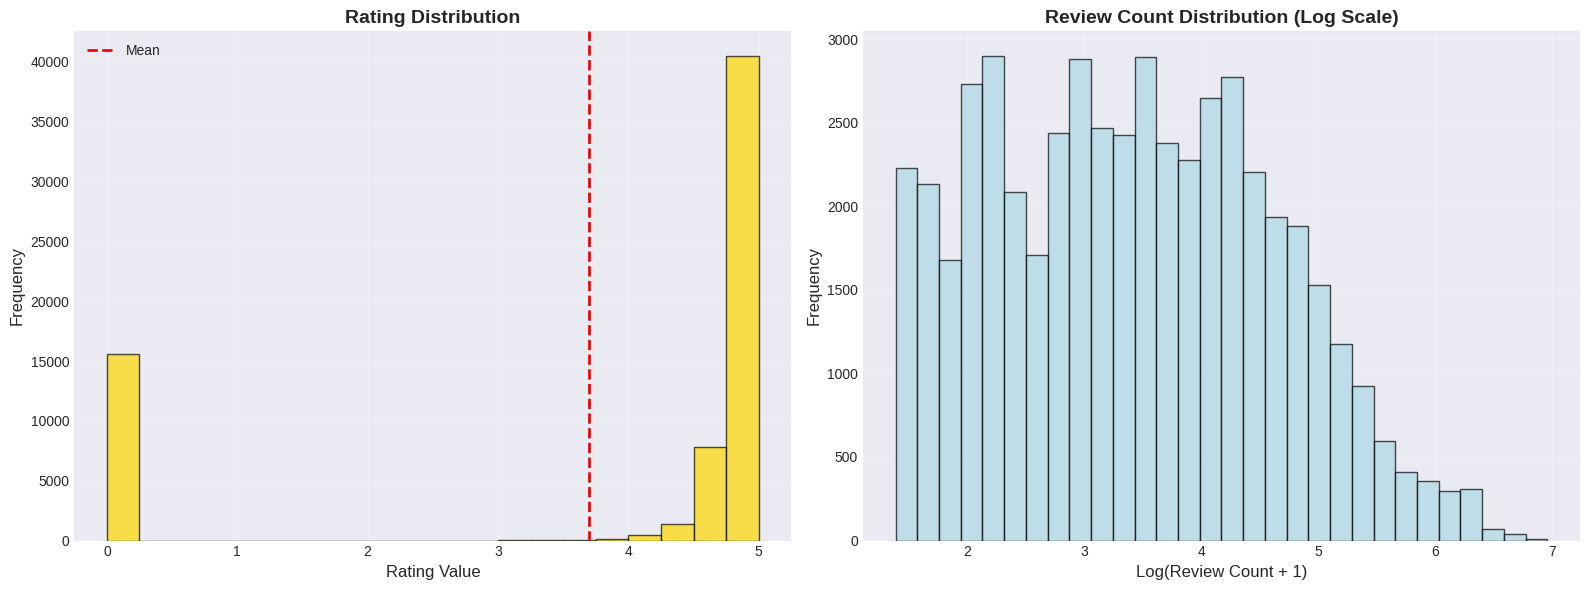

In [33]:
# Rating and review visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Rating distribution
df_with_rating = df[df['rating_value'].notna()]
axes[0].hist(df_with_rating['rating_value'], bins=20, color='gold', edgecolor='black', alpha=0.7)
axes[0].axvline(df_with_rating['rating_value'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].set_xlabel('Rating Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Rating Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Review count distribution (log scale)
df_with_reviews = df[df['rating_count'] > 0]
axes[1].hist(np.log1p(df_with_reviews['rating_count']), bins=30, color='lightblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log(Review Count + 1)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Review Count Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

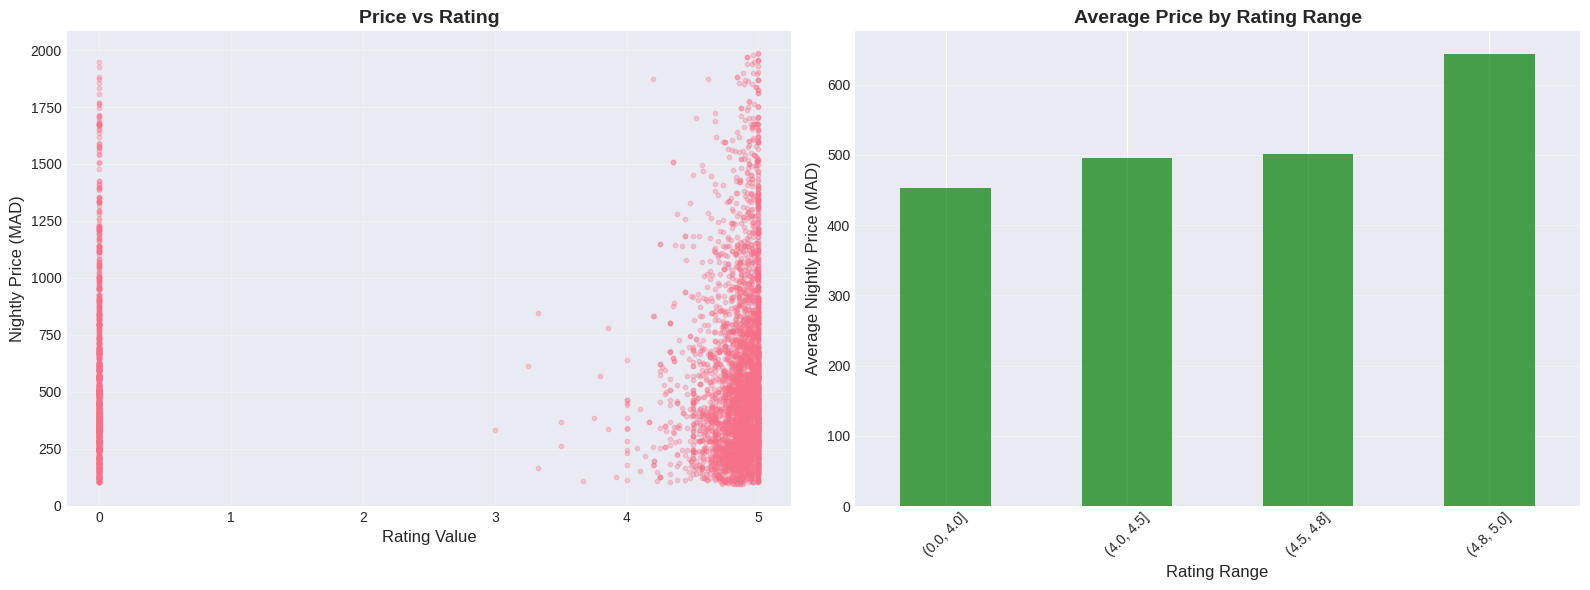

In [34]:
# Price vs rating relationship
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
df_clean = df[(df['rating_value'].notna()) & (df['nightly_price'] < 2000)].sample(min(5000, len(df)))
axes[0].scatter(df_clean['rating_value'], df_clean['nightly_price'], alpha=0.3, s=10)
axes[0].set_xlabel('Rating Value', fontsize=12)
axes[0].set_ylabel('Nightly Price (MAD)', fontsize=12)
axes[0].set_title('Price vs Rating', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Average price by rating bin
df_with_rating = df[df['rating_value'].notna()].copy()
df_with_rating['rating_bin'] = pd.cut(df_with_rating['rating_value'], bins=[0, 4.0, 4.5, 4.8, 5.0])
rating_bin_prices = df_with_rating.groupby('rating_bin')['nightly_price'].mean()
rating_bin_prices.plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_xlabel('Rating Range', fontsize=12)
axes[1].set_ylabel('Average Nightly Price (MAD)', fontsize=12)
axes[1].set_title('Average Price by Rating Range', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Superhost & Badges Analysis

In [35]:
# Superhost distribution
print("\n⭐ Superhost Distribution")
print("=" * 70)
superhost_counts = df['is_superhost'].value_counts()
print(superhost_counts)
print(f"\nPercentage of superhosts: {(df['is_superhost'].sum() / len(df) * 100):.2f}%")


⭐ Superhost Distribution
is_superhost
False    54906
True     11082
Name: count, dtype: int64

Percentage of superhosts: 16.79%


In [36]:
# Price comparison: superhost vs non-superhost
print("\n💰 Price Comparison: Superhost vs Non-Superhost")
print("=" * 70)
superhost_prices = df.groupby('is_superhost')['nightly_price'].agg(['mean', 'median', 'std', 'count'])
superhost_prices.columns = ['Mean', 'Median', 'Std Dev', 'Count']
superhost_prices.index = ['Non-Superhost', 'Superhost']
print(superhost_prices.round(2))

# Calculate premium
if True in df['is_superhost'].values and False in df['is_superhost'].values:
    superhost_mean = df[df['is_superhost'] == True]['nightly_price'].mean()
    non_superhost_mean = df[df['is_superhost'] == False]['nightly_price'].mean()
    premium_pct = ((superhost_mean - non_superhost_mean) / non_superhost_mean * 100)
    print(f"\nSuperhost premium: {premium_pct:.2f}%")


💰 Price Comparison: Superhost vs Non-Superhost
                Mean  Median  Std Dev  Count
Non-Superhost 593.45  458.14   457.01  54906
Superhost     625.24  504.93   451.18  11082

Superhost premium: 5.36%



🏆 Badge Count Distribution
badge_count
0    25614
1    40374
Name: count, dtype: int64


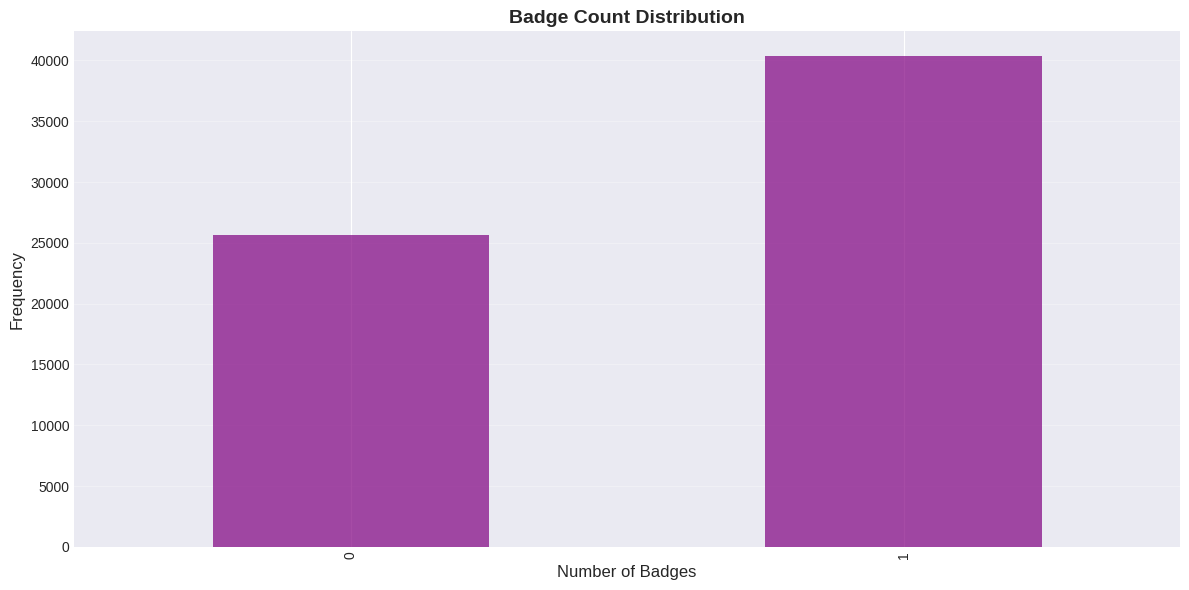

In [37]:
# Badge count distribution
print("\n🏆 Badge Count Distribution")
print("=" * 70)
badge_counts = df['badge_count'].value_counts().sort_index()
print(badge_counts)

plt.figure(figsize=(12, 6))
badge_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel('Number of Badges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Badge Count Distribution', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Correlation Analysis

In [38]:
# Select numeric features for correlation
numeric_features = [
    'nightly_price', 'total_price', 'discount_rate', 'stay_length_nights',
    'bedroom_count', 'bed_count', 'rating_value', 'rating_count',
    'badge_count', 'image_count', 'latitude', 'longitude'
]

# Correlation matrix
corr_matrix = df[numeric_features].corr()

print("\n🔗 Correlation with Nightly Price (sorted by absolute value)")
print("=" * 70)
price_corr = corr_matrix['nightly_price'].sort_values(ascending=False)
print(price_corr.round(3))


🔗 Correlation with Nightly Price (sorted by absolute value)
nightly_price         1.00
total_price           0.69
bedroom_count         0.16
bed_count             0.13
discount_rate         0.10
badge_count           0.07
image_count           0.04
rating_value          0.01
rating_count         -0.01
latitude             -0.10
longitude            -0.11
stay_length_nights   -0.40
Name: nightly_price, dtype: float64


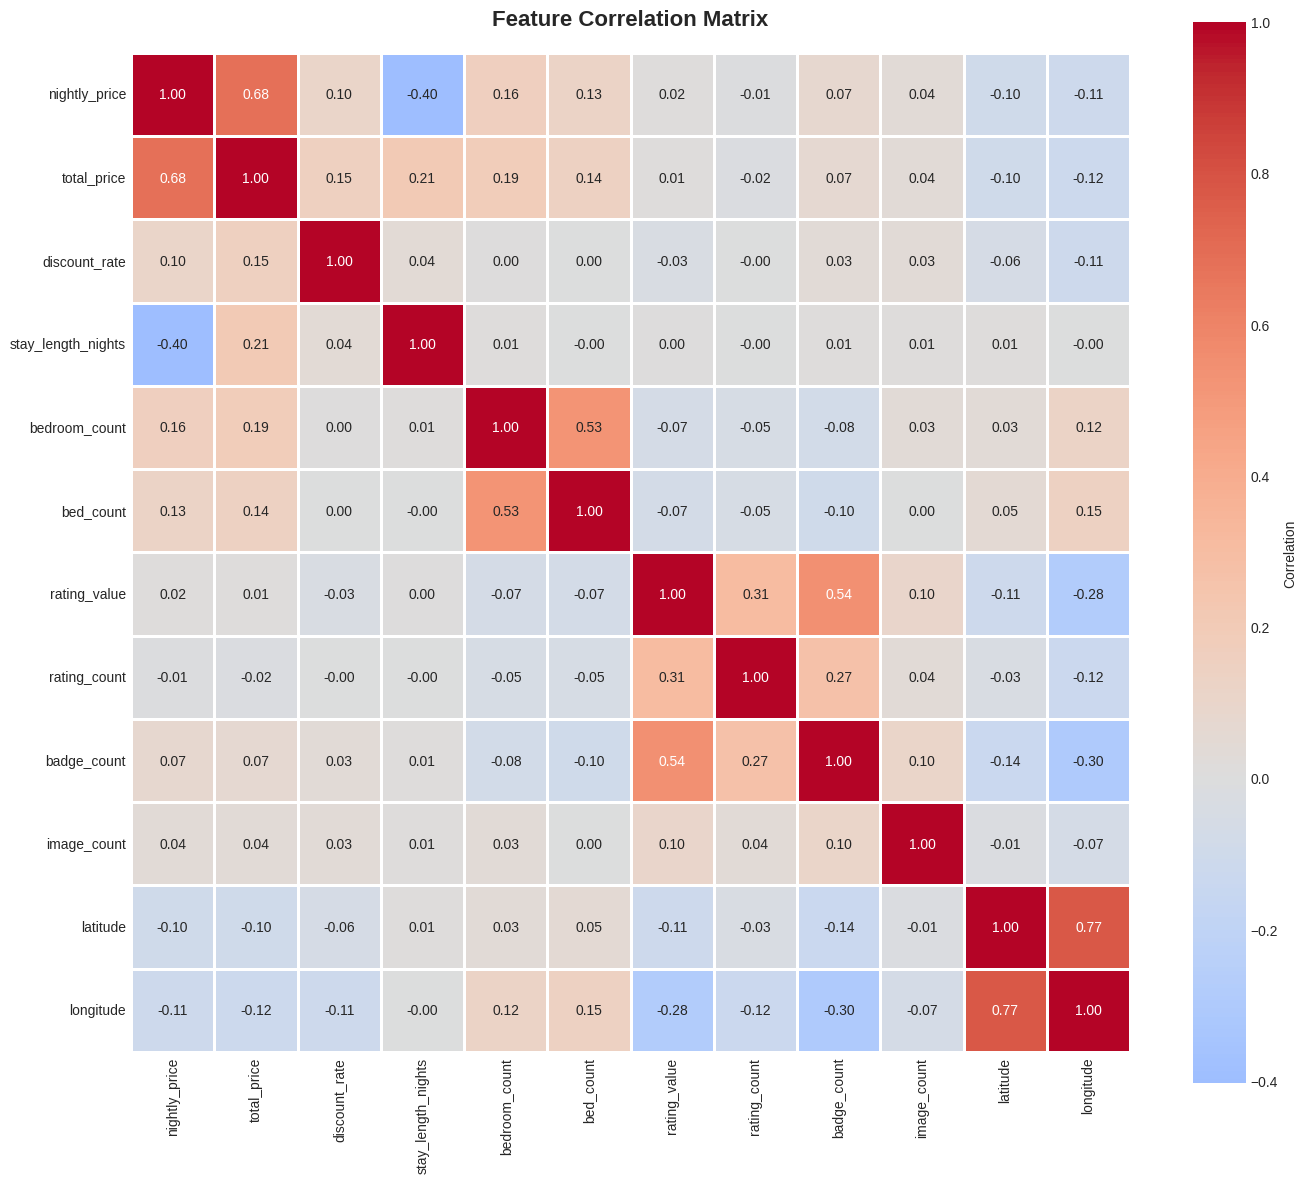

In [39]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

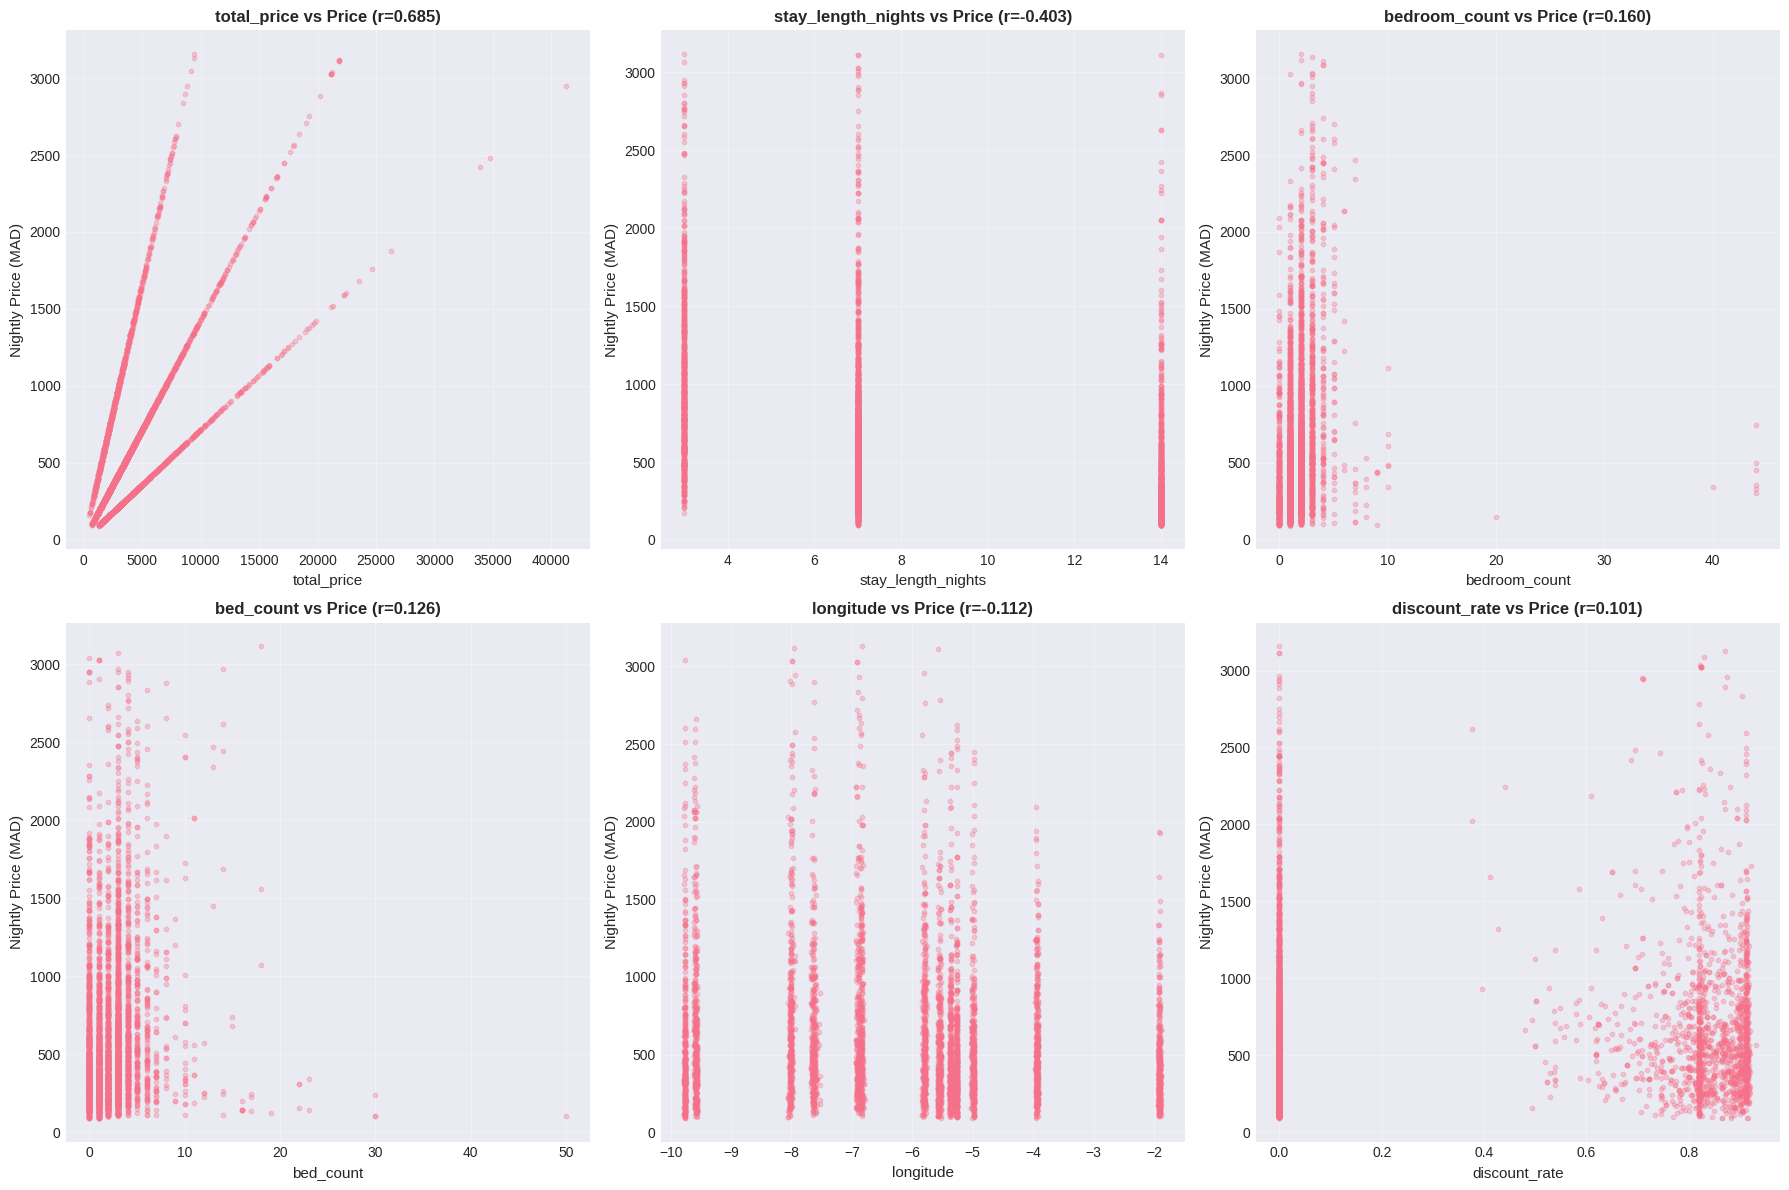

In [40]:
# Top correlations with price (scatter plots)
top_features = price_corr.abs().sort_values(ascending=False).index[1:7]  # Exclude self-correlation

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    # Sample for performance
    sample_df = df[[feature, 'nightly_price']].dropna().sample(min(5000, len(df)))
    
    axes[i].scatter(sample_df[feature], sample_df['nightly_price'], alpha=0.3, s=10)
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Nightly Price (MAD)', fontsize=11)
    axes[i].set_title(f'{feature} vs Price (r={price_corr[feature]:.3f})', fontsize=12, fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Key Insights & Recommendations

In [41]:
print("\n" + "=" * 70)
print("📊 KEY INSIGHTS FROM EDA")
print("=" * 70)

print("\n1. DATA QUALITY")
print("   ✅ No missing values in critical features")
print(f"   ✅ {len(df):,} listings after deduplication and outlier removal")
print("   ✅ All 13 cities properly represented")

print("\n2. GEOGRAPHIC PATTERNS")
top_city = city_prices.index[0]
cheapest_city = city_prices.index[-1]
print(f"   • Most expensive city: {top_city} (avg {city_prices.loc[top_city, 'Mean']:.0f} MAD/night)")
print(f"   • Most affordable city: {cheapest_city} (avg {city_prices.loc[cheapest_city, 'Mean']:.0f} MAD/night)")
print(f"   • Price variation: {(city_prices['Mean'].max() / city_prices['Mean'].min() - 1) * 100:.1f}% difference")

print("\n3. SEASONAL TRENDS")
most_expensive_season = season_prices.index[0]
cheapest_season = season_prices.index[-1]
print(f"   • Highest prices: {most_expensive_season} (avg {season_prices.loc[most_expensive_season, 'Mean']:.0f} MAD)")
print(f"   • Lowest prices: {cheapest_season} (avg {season_prices.loc[cheapest_season, 'Mean']:.0f} MAD)")
print(f"   • Seasonal variation: {(season_prices['Mean'].max() / season_prices['Mean'].min() - 1) * 100:.1f}%")

print("\n4. PROPERTY CHARACTERISTICS")
print(f"   • {(room_type_counts.iloc[0] / len(df) * 100):.1f}% {room_type_counts.index[0]}")
print(f"   • {(property_type_counts.iloc[0] / len(df) * 100):.1f}% {property_type_counts.index[0]}")
print(f"   • Avg bedrooms: {df['bedroom_count'].mean():.1f}, Avg beds: {df['bed_count'].mean():.1f}")

print("\n5. PRICING INSIGHTS")
print(f"   • Median price: {df['nightly_price'].median():.0f} MAD/night")
print(f"   • Price range (1%-99%): {df['nightly_price'].quantile(0.01):.0f} - {df['nightly_price'].quantile(0.99):.0f} MAD")
print(f"   • Most common stay length: {df['stay_length_nights'].mode()[0]:.0f} nights")

print("\n6. QUALITY INDICATORS")
if df['rating_value'].notna().sum() > 0:
    print(f"   • Avg rating: {df['rating_value'].mean():.2f}/5.0")
    print(f"   • {(df['rating_value'].notna().sum() / len(df) * 100):.1f}% have ratings")
print(f"   • {(df['is_superhost'].sum() / len(df) * 100):.1f}% superhosts")
if True in df['is_superhost'].values and False in df['is_superhost'].values:
    print(f"   • Superhost premium: {premium_pct:.1f}%")

print("\n7. TOP PRICE CORRELATIONS")
for feature, corr in price_corr.abs().sort_values(ascending=False)[1:6].items():
    print(f"   • {feature:25s}: {price_corr[feature]:6.3f}")

print("\n" + "=" * 70)
print("✅ EDA COMPLETE - Ready for Feature Engineering")
print("=" * 70)


📊 KEY INSIGHTS FROM EDA

1. DATA QUALITY
   ✅ No missing values in critical features
   ✅ 65,988 listings after deduplication and outlier removal
   ✅ All 13 cities properly represented

2. GEOGRAPHIC PATTERNS
   • Most expensive city: Marrakech (avg 762 MAD/night)
   • Most affordable city: Oujda (avg 473 MAD/night)
   • Price variation: 61.0% difference

3. SEASONAL TRENDS
   • Highest prices: winter (avg 697 MAD)
   • Lowest prices: summer (avg 543 MAD)
   • Seasonal variation: 28.3%

4. PROPERTY CHARACTERISTICS
   • 90.0% Entire home/apt
   • 66.5% Apartment
   • Avg bedrooms: 1.7, Avg beds: 2.4

5. PRICING INSIGHTS
   • Median price: 467 MAD/night
   • Price range (1%-99%): 108 - 2399 MAD
   • Most common stay length: 7 nights

6. QUALITY INDICATORS
   • Avg rating: 3.70/5.0
   • 100.0% have ratings
   • 16.8% superhosts
   • Superhost premium: 5.4%

7. TOP PRICE CORRELATIONS
   • total_price              :  0.685
   • stay_length_nights       : -0.403
   • bedroom_count         